In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" studies
#2239 documents considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/separated_pdfs"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} articles".format(len(doc_list)))

We have a total of 2239 articles


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [13]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 2161), ('hippocampus', 995), ('cingulate cortex', 860), ('cerebellum', 759), ('amygdala', 726), ('cuneus', 660), ('precuneus', 598), ('anterior cingulate cortex', 486), ('cerebellar crus', 385), ('posterior cingulate gyrus', 291), ('premotor cortex', 283), ('insular cortex', 279), ('auditory cortex', 271), ('caudate nucleus', 259), ('superior temporal gyrus', 191), ('dorsolateral prefrontal cortex', 186), ('lenticular nucleus', 163), ('ventral tegmental area', 159), ('orbitofrontal area', 157), ('orbital inferior frontal gyrus', 140), ('supplementary motor cortex', 130), ('intralaminar thalamus', 129), ('inferior parietal gyrus', 126), ('precentral gyrus', 122), ('lenticular nucleus pallidum', 116), ('angular gyrus', 112), ('fusiform gyrus', 106), ('postcentral gyrus', 105), ('primary motor cortex', 103), ('middle temporal gyrus', 102), ('middle frontal gyrus', 98), ('substantia nigra', 94), ('locus coeruleus', 91), ('superior frontal gyrus', 81), ('ventral entor

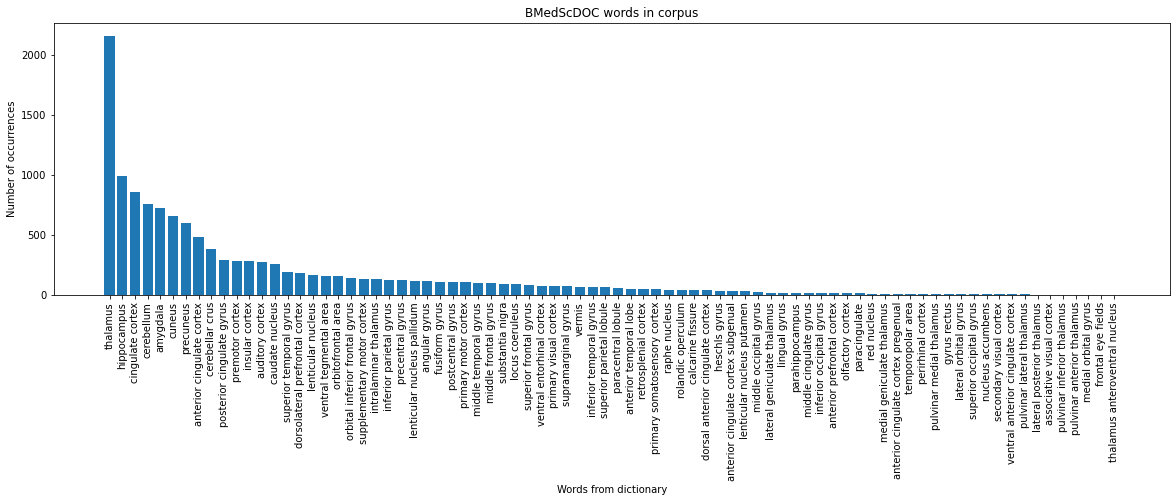

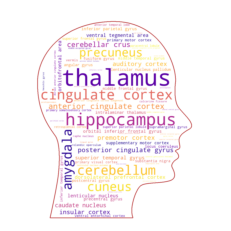

In [14]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)

In [15]:
total = [('thalamus', 2161), ('hippocampus', 995), ('cingulate cortex', 860), ('cerebellum', 759), ('amygdala', 726), ('cuneus', 660), ('precuneus', 598), ('anterior cingulate cortex', 486), ('cerebellar crus', 385), ('posterior cingulate gyrus', 291), ('premotor cortex', 283), ('insular cortex', 279), ('auditory cortex', 271), ('caudate nucleus', 259), ('superior temporal gyrus', 191), ('dorsolateral prefrontal cortex', 186), ('lenticular nucleus', 163), ('ventral tegmental area', 159), ('orbitofrontal area', 157), ('orbital inferior frontal gyrus', 140), ('supplementary motor cortex', 130), ('intralaminar thalamus', 129), ('inferior parietal gyrus', 126), ('precentral gyrus', 122), ('lenticular nucleus pallidum', 116), ('angular gyrus', 112), ('fusiform gyrus', 106), ('postcentral gyrus', 105), ('primary motor cortex', 103), ('middle temporal gyrus', 102), ('middle frontal gyrus', 98), ('substantia nigra', 94), ('locus coeruleus', 91), ('superior frontal gyrus', 81), ('ventral entorhinal cortex', 73), ('primary visual cortex', 70), ('supramarginal gyrus', 70), ('vermis', 67), ('inferior temporal gyrus', 67), ('superior parietal lobule', 62), ('paracentral lobule', 54), ('anterior temporal lobe', 52), ('retrosplenial cortex', 50), ('primary somatosensory cortex', 50), ('raphe nucleus', 44), ('rolandic operculum', 42), ('calcarine fissure', 42), ('dorsal anterior cingulate cortex', 38), ('heschls gyrus', 34), ('anterior cingulate cortex subgenual', 34), ('lenticular nucleus putamen', 29), ('middle occipital gyrus', 22), ('lateral geniculate thalamus', 19), ('lingual gyrus', 18), ('parahippocampus', 16), ('middle cingulate gyrus', 13), ('inferior occipital gyrus', 11), ('anterior prefrontal cortex', 11), ('olfactory cortex', 11), ('paracingulate', 11), ('red nucleus', 10), ('medial geniculate thalamus', 9), ('anterior cingulate cortex pregenual', 9), ('temporopolar area', 8), ('perirhinal cortex', 8), ('pulvinar medial thalamus', 7), ('gyrus rectus', 7), ('lateral orbital gyrus', 6), ('superior occipital gyrus', 5), ('nucleus accumbens', 4), ('secondary visual cortex', 4), ('ventral anterior cingulate cortex', 3), ('pulvinar lateral thalamus', 3), ('lateral posterior thalamus', 2), ('associative visual cortex', 2), ('pulvinar inferior thalamus', 2), ('pulvinar anterior thalamus', 2), ('medial orbital gyrus', 1), ('frontal eye fields', 1), ('thalamus anteroventral nucleus', 1)]
len(total)

80

In [16]:
total

[('thalamus', 2161),
 ('hippocampus', 995),
 ('cingulate cortex', 860),
 ('cerebellum', 759),
 ('amygdala', 726),
 ('cuneus', 660),
 ('precuneus', 598),
 ('anterior cingulate cortex', 486),
 ('cerebellar crus', 385),
 ('posterior cingulate gyrus', 291),
 ('premotor cortex', 283),
 ('insular cortex', 279),
 ('auditory cortex', 271),
 ('caudate nucleus', 259),
 ('superior temporal gyrus', 191),
 ('dorsolateral prefrontal cortex', 186),
 ('lenticular nucleus', 163),
 ('ventral tegmental area', 159),
 ('orbitofrontal area', 157),
 ('orbital inferior frontal gyrus', 140),
 ('supplementary motor cortex', 130),
 ('intralaminar thalamus', 129),
 ('inferior parietal gyrus', 126),
 ('precentral gyrus', 122),
 ('lenticular nucleus pallidum', 116),
 ('angular gyrus', 112),
 ('fusiform gyrus', 106),
 ('postcentral gyrus', 105),
 ('primary motor cortex', 103),
 ('middle temporal gyrus', 102),
 ('middle frontal gyrus', 98),
 ('substantia nigra', 94),
 ('locus coeruleus', 91),
 ('superior frontal gyru